In [1]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/humairmunir/anaemia-prediction')

Skipping, found downloaded files in ".\anaemia-prediction" (use force=True to force download)


## Load dataset

In [2]:
import pandas as pd

In [3]:
df_anemia = pd.read_csv('anaemia-prediction/output.csv')

## Data study

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df_anemia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        104 non-null    int64  
 1   Sex           104 non-null    object 
 2   %Red Pixel    104 non-null    float64
 3   %Green pixel  104 non-null    float64
 4   %Blue pixel   104 non-null    float64
 5   Hb            104 non-null    float64
 6   Anaemic       104 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.8+ KB


In [6]:
df_anemia.head()

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No


In [7]:
df_anemia.tail()

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
99,100,F,49.9999,29.2860,20.7141,14.5,Yes
100,101,M,42.2324,30.6757,27.0919,6.3,Yes
101,102,F,45.6064,31.9084,22.4852,12.7,No
102,103,M,45.2095,29.2769,25.5136,13.4,No
103,104,F,43.5706,29.8094,26.6199,12.2,No


In [8]:
df_anemia.describe()

,Number,%Red Pixel,%Green pixel,%Blue pixel,Hb
count,104.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,45.654175,28.875507,25.470325,12.150962
std,30.166206,2.816294,1.554275,1.984671,2.512957
min,1.000000,38.796800,25.140300,19.541300,2.800000
25%,26.750000,43.911375,27.871300,24.896425,10.650000
50%,52.500000,45.385350,28.948750,25.953200,12.600000
75%,78.250000,46.968325,29.887275,26.721600,14.000000
max,104.000000,54.647800,32.368100,29.841400,16.300000


In [9]:
df_anemia.isnull().sum()

Number          0
Sex             0
%Red Pixel      0
%Green pixel    0
%Blue pixel     0
Hb              0
Anaemic         0
dtype: int64

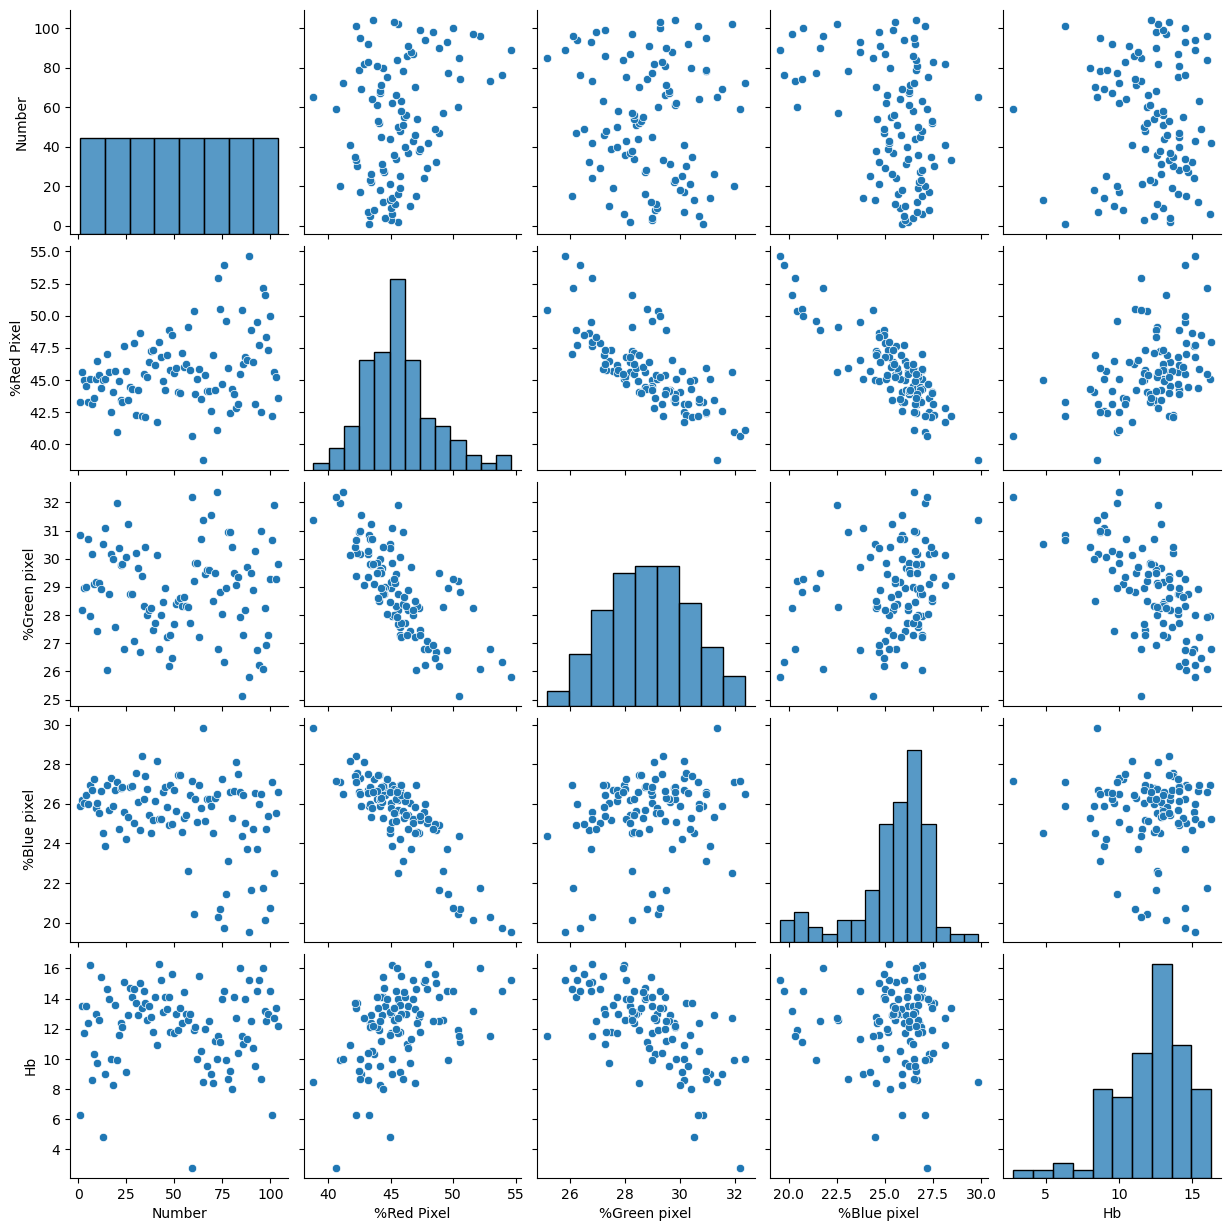

In [10]:
sns.pairplot(df_anemia);

C:\Users\anton\AppData\Local\Temp\ipykernel_41204\1864260314.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_anemia.corr(), annot=True);


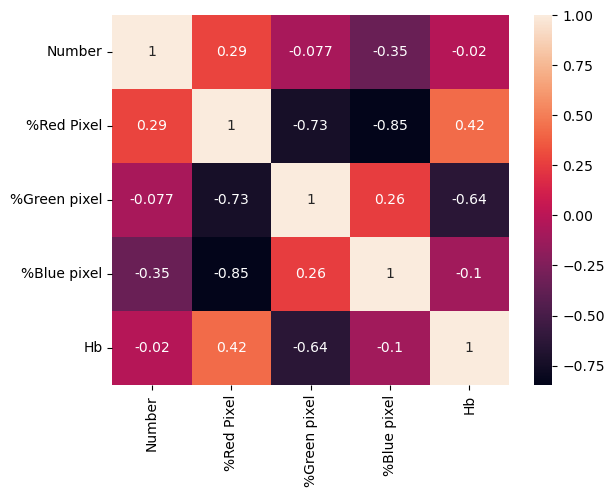

In [11]:
sns.heatmap(df_anemia.corr(), annot=True);

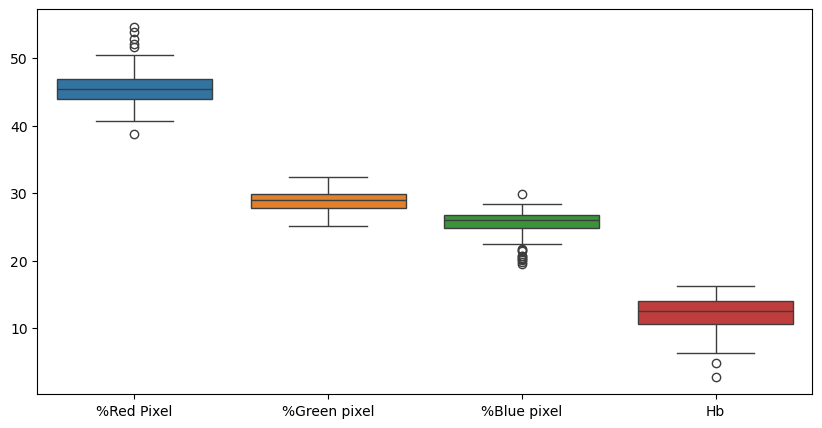

In [12]:
plt.figure(figsize=(10, 5))
sns.boxplot(df_anemia.drop('Number', axis=1))
plt.show()

## Data preprocessing

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [14]:
X = df_anemia.drop(['Number','Anaemic'], axis=1)
y = df_anemia['Anaemic']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    stratify=y.to_numpy())

In [16]:
le = LabelEncoder()
X_train[:,0] = le.fit_transform(X_train[:,0])

In [17]:
X_train[:10]

array([[1, 45.0107, 28.9677, 26.0215, 11.7],
       [3, 43.4837, 30.7106, 25.8057, 10.5],
       [2, 42.1652, 29.3907, 28.4441, 13.4],
       [3, 46.9942, 26.0496, 26.9562, 14.6],
       [1, 40.9365, 31.9687, 27.0948, 9.9],
       [2, 52.154, 26.0853, 21.7607, 16.0],
       [1, 44.1995, 29.486, 26.3145, 11.2],
       [2, 44.1868, 28.9764, 26.8368, 14.1],
       [2, 44.2572, 29.6578, 26.085, 12.9],
       [2, 47.9777, 26.7981, 25.2242, 16.3]], dtype=object)

In [18]:
X_test[:,0] = le.transform(X_test[:,0])

In [19]:
X_test[:10]

array([[1, 43.8783, 29.4752, 26.6465, 14.1],
       [2, 42.2473, 30.2089, 27.5438, 13.7],
       [0, 50.4801, 25.1403, 24.3796, 11.5],
       [1, 42.1528, 30.432, 27.4152, 13.7],
       [3, 45.2588, 28.0079, 26.7333, 12.6],
       [3, 43.1425, 30.289, 26.5686, 9.5],
       [0, 43.5706, 29.8094, 26.6199, 12.2],
       [3, 46.2133, 28.3358, 25.4509, 13.0],
       [3, 45.0484, 31.1049, 23.8467, 9.0],
       [1, 46.3745, 28.882, 24.7435, 10.7]], dtype=object)

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

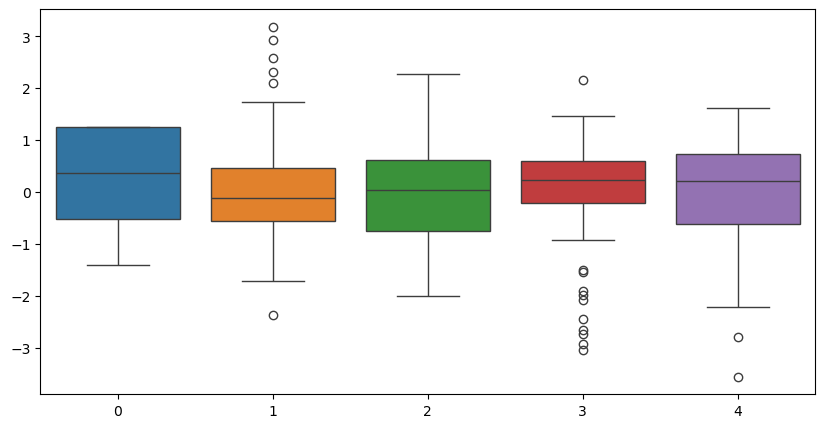

In [21]:
plt.figure(figsize=(10, 5))
sns.boxplot(X_train_scaled)
plt.show()

## Running some experiments

### Training a RandomForest model

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
clf_rf = RandomForestClassifier().fit(X_train_scaled, y_train)

### Evaluating the model

In [24]:
from sklearn import metrics

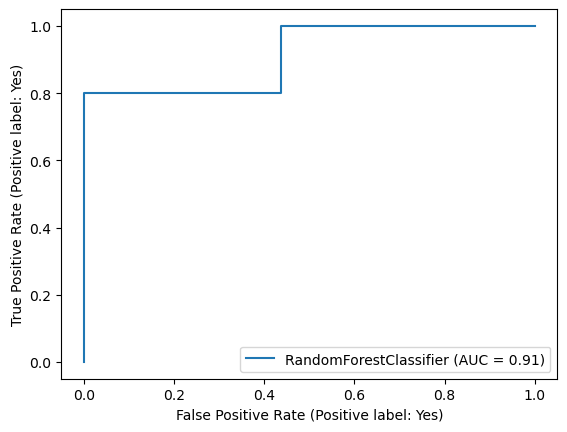

In [25]:
metrics.RocCurveDisplay.from_estimator(clf_rf, X_test_scaled, y_test)
plt.show()

Accuracy:95.24%


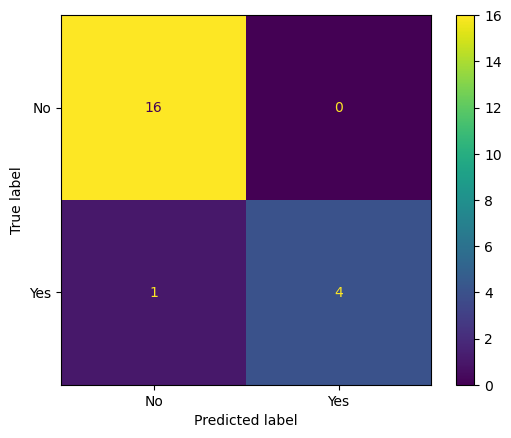

              precision    recall  f1-score   support

          No       0.94      1.00      0.97        16
         Yes       1.00      0.80      0.89         5

    accuracy                           0.95        21
   macro avg       0.97      0.90      0.93        21
weighted avg       0.96      0.95      0.95        21



In [26]:
y_pred = clf_rf.predict(X_test_scaled)
print(f'Accuracy:{metrics.accuracy_score(y_test,y_pred)*100:.2f}%')
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(cm, display_labels=['No','Yes'])
disp.plot()
plt.show()
print(metrics.classification_report(y_test, y_pred))

### Logistic Regression model

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
clf_lgr = LogisticRegression().fit(X_train_scaled, y_train)

### Evaluating the model

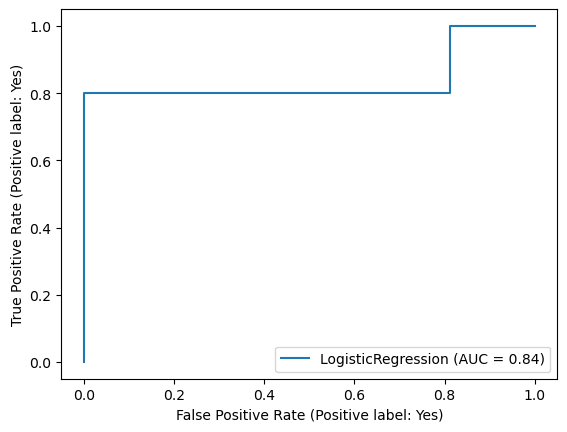

In [29]:
metrics.RocCurveDisplay.from_estimator(clf_lgr, X_test_scaled, y_test)
plt.show()

Accuracy:95.24%


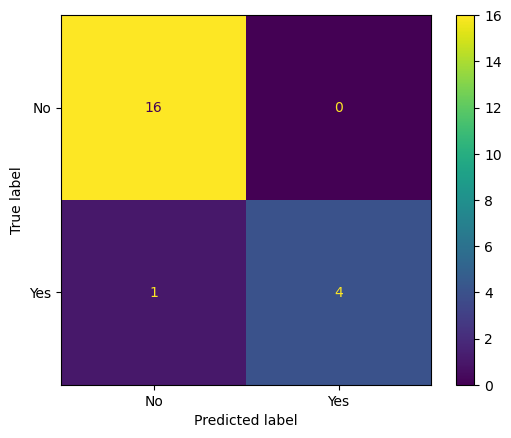

              precision    recall  f1-score   support

          No       0.94      1.00      0.97        16
         Yes       1.00      0.80      0.89         5

    accuracy                           0.95        21
   macro avg       0.97      0.90      0.93        21
weighted avg       0.96      0.95      0.95        21



In [30]:
y_pred = clf_lgr.predict(X_test_scaled)
print(f'Accuracy:{metrics.accuracy_score(y_test,y_pred)*100:.2f}%')
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(cm, display_labels=['No','Yes'])
disp.plot()
plt.show()
print(metrics.classification_report(y_test, y_pred))

### SVM model

In [31]:
from sklearn.svm import SVC

In [32]:
clf_svm = SVC().fit(X_train_scaled, y_train)

### Evaluating the model

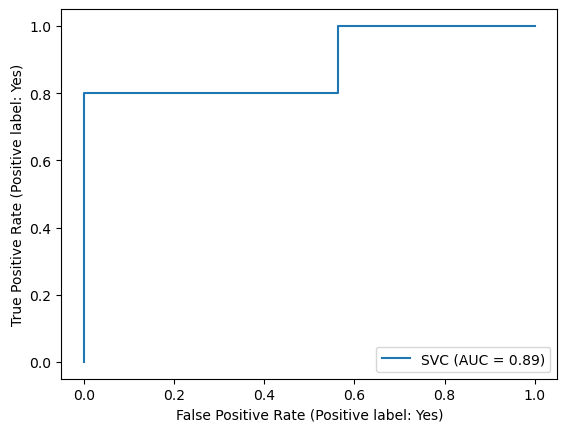

In [33]:
metrics.RocCurveDisplay.from_estimator(clf_svm, X_test_scaled, y_test)
plt.show()

Accuracy:95.24%


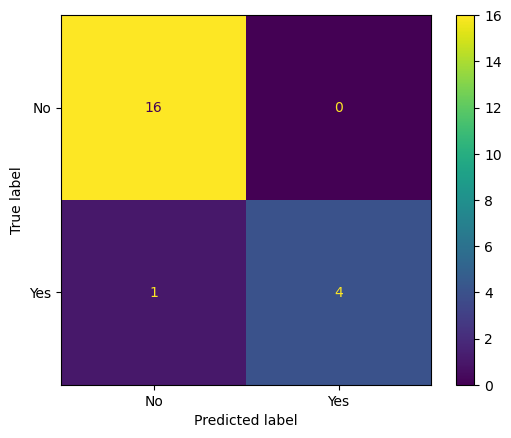

              precision    recall  f1-score   support

          No       0.94      1.00      0.97        16
         Yes       1.00      0.80      0.89         5

    accuracy                           0.95        21
   macro avg       0.97      0.90      0.93        21
weighted avg       0.96      0.95      0.95        21



In [34]:
y_pred = clf_svm.predict(X_test_scaled)
print(f'Accuracy:{metrics.accuracy_score(y_test,y_pred)*100:.2f}%')
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(cm, display_labels=['No','Yes'])
disp.plot()
plt.show()
print(metrics.classification_report(y_test, y_pred))